In [48]:
import numpy as np
import pandas as pd

In [17]:
X=[[163],[179],[166],[169],[171]]
y=[54,63,57,56,58]

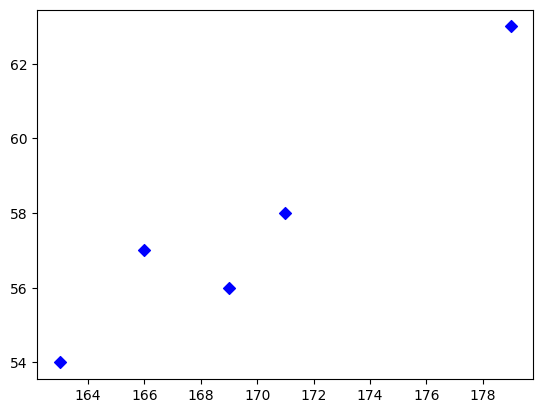

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color="blue", marker="D")

In [19]:
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

In [20]:
regr=linear_model.LinearRegression()
# regr = LinearRegression()

In [21]:
regr.fit(X,y) #fit : 훈련시키다. = 학습시킨다.

LinearRegression()

In [28]:
coef=regr.coef_  #coef : w,기울기, 계수, 가중치
coef

array([0.53125])

In [34]:
coef_n = coef.round(2) #소수점 3째자리에서 반올림
coef_n

array([0.53])

In [31]:
intercept=regr.intercept_  #intercept : b, 기본값, 절편
intercept

-32.500000000000036

In [35]:
intercept_n=intercept.round(2) #소수점 3째자리에서 반올림
intercept_n

-32.5

In [73]:
score=regr.score(X,y) # score = R2, 결정계수, 회귀식이 데이터를 얼마나 잘 설명하느냐.(max:1,min:0)
score           

0.9191095132743363

In [74]:
print(f"y={coef_n}*X+{intercept_n}") # y = w*X + b
print("데이터와 선형회귀 직선의 관계점수:{:.1%}".format(score))

y=[0.53]*X+-32.5
데이터와 선형회귀 직선의 관계점수:91.9%


In [78]:
y[0] # y[0]의 결과값

54

In [79]:
y_pred = []
for i in range(len(y)):
    y_pred.append(coef_n*X[i]+intercept_n)

In [80]:
y_pred

[array([53.89]),
 array([62.37]),
 array([55.48]),
 array([57.07]),
 array([58.13])]

In [81]:
df = pd.DataFrame(y,columns=['y_real'])

In [82]:
df['y_pred']=y_pred

In [83]:
df

,y_real,y_pred
0,54,[53.89]
1,63,[62.370000000000005]
2,57,[55.480000000000004]
3,56,[57.07000000000001]
4,58,[58.13000000000001]


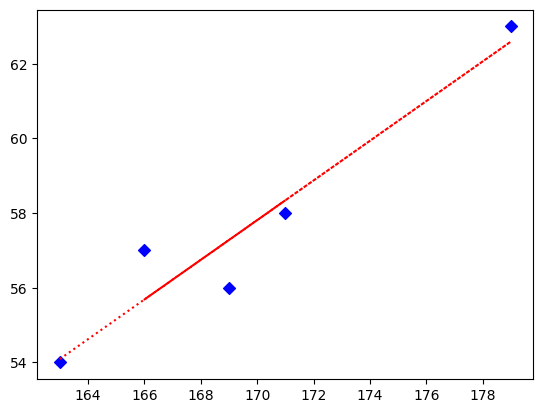

In [84]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color="blue", marker="D")

y_pred=regr.predict(X)

plt.plot(X,y_pred,'r:')

In [85]:
X1 = [[174], [176], [160]]
y1 = regr.predict(X1)
print(X1, y1)

[[174], [176], [160]] [59.9375 61.     52.5   ]


In [86]:
X= [[168,0],[166,0],[173,0],[165,0],[177,0],[163,0], \
    [178,0],[172,0],[163,1],[162,1],[171,1],[162,1], \
    [164,1],[162,1],[158,1],[173,1]]
y = [65,61,68,63,68,61,76,67,55,51,59,53,61,56,44,57]

In [87]:
regr.fit(X,y)

LinearRegression()

In [88]:
print(regr.coef_)
print(regr.intercept_)
print(regr.score(X,y))
print(regr.predict([[179,0],[164,1]]))

[ 0.74803397 -7.23030041]
-61.227783894306384
0.8425933302504424
[72.67029726 54.21948726]


In [89]:
y_pred = regr.predict(X)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y, y_pred))
print((mean_squared_error(y, y_pred))**0.5)

2.1998073293488494
2.9845634264219147


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [93]:
df_data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [94]:
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [95]:
df_labels.value_counts()

0
1    357
0    212
Name: count, dtype: int64

In [96]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [97]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [98]:
df_labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [99]:
df_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [100]:
df_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [101]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [102]:
df_data.isna().sum().max()

0

In [103]:
df_labels.value_counts()

0
1    357
0    212
Name: count, dtype: int64

In [104]:
df = df_data.copy()
df["label"] =  df_labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: xlabel='label', ylabel='count'>

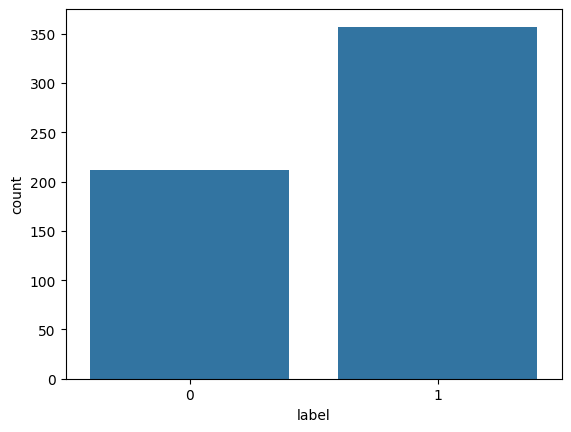

In [105]:
sns.countplot(data = df, x = "label")

In [106]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

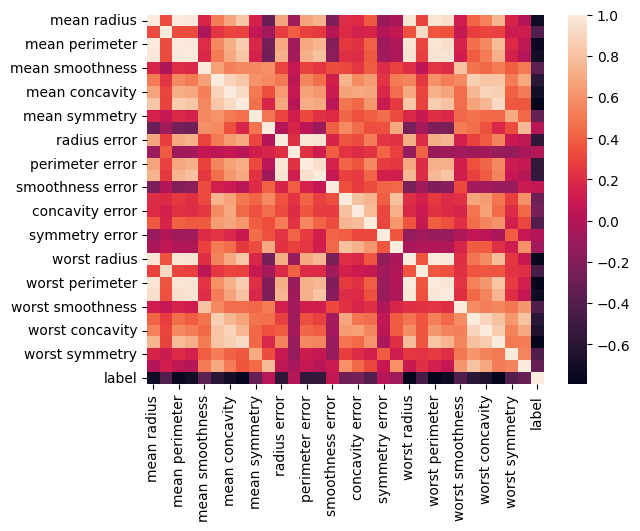

In [107]:
sns.heatmap(df.corr())

* nomalize

In [108]:
def min_max_normalize(lst):
    normalized = []

    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst)) # 800~1000  900: (900-800)/200 -> 0.5, 1000 : (1000-800)/200 = 1.0 -> 1
        normalized.append(normalized_num)

    return normalized

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_data)
df_scaled = pd.DataFrame(df_scaled, columns=breast_cancer_data.feature_names)
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [110]:
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# for x in df_data.columns:
#     df_data[x] = min_max_normalize(df_data[x])
# df_data.describe()

In [ ]:
# X, y 데이터 분리

In [ ]:
# 학습데이터/평가데이터 분리

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(df_scaled, df_labels,
                                                     test_size = 0.2, random_state = 156, stratify = df_labels)

In [112]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455, 1)
(114, 1)


In [113]:
print(y_train.value_counts()/len(y_train))

0
1    0.626374
0    0.373626
Name: count, dtype: float64


In [114]:
print(y_test.value_counts()/len(y_test))

0
1    0.631579
0    0.368421
Name: count, dtype: float64


In [115]:
# KNN 분류분석

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [117]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
# 평가지표
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score

In [119]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



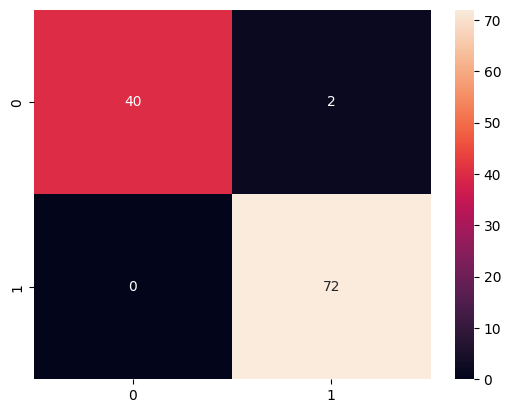

precision = 0.9730
recall = 1.0000


In [120]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)
plt.show()
print("precision = %6.4f" % precision_score(y_test,y_pred))
print("recall = %6.4f" % recall_score(y_test,y_pred))

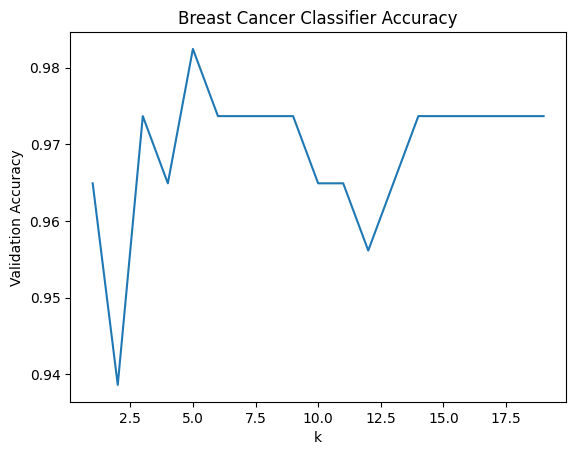

In [121]:
k_list = range(1,20)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [122]:
accuracies

[0.9649122807017544,
 0.9385964912280702,
 0.9736842105263158,
 0.9649122807017544,
 0.9824561403508771,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544,
 0.956140350877193,
 0.9649122807017544,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


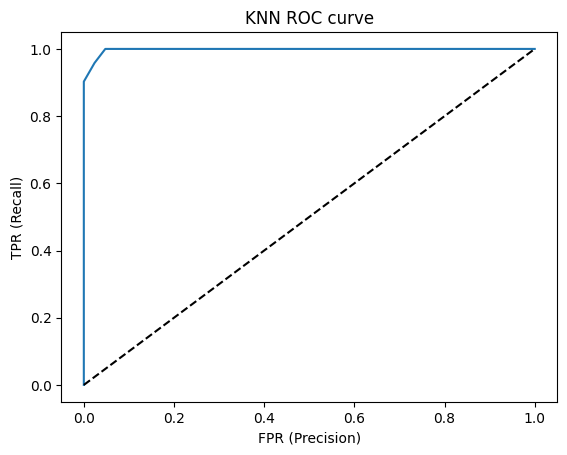

Area under curve (AUC):  0.9978505291005291


In [124]:
y_score = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('KNN ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [125]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [126]:
gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))

0.9385964912280702


In [127]:
y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



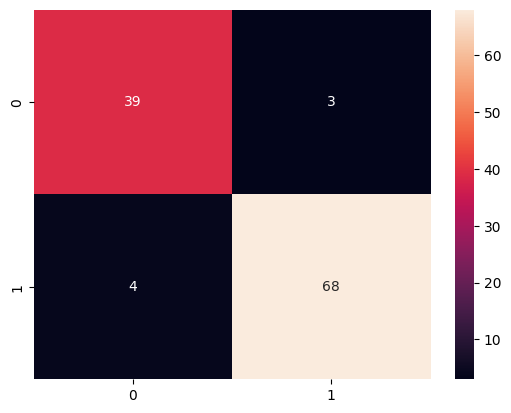

precision = 0.9577
recall = 0.9444


In [128]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)
plt.show()
print("precision = %6.4f" % precision_score(y_test,y_pred))
print("recall = %6.4f" % recall_score(y_test,y_pred))

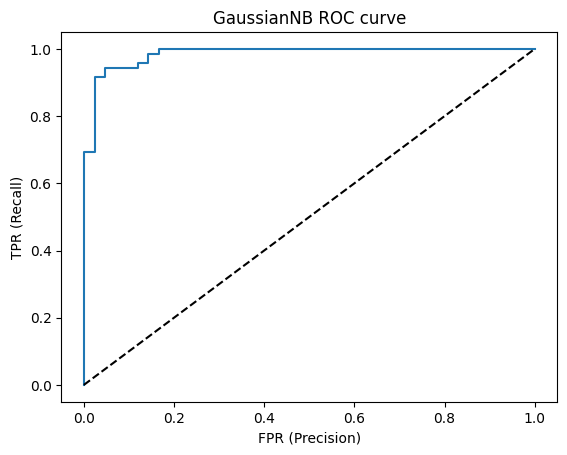

Area under curve (AUC):  0.9854497354497356


In [129]:
y_score = gnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('GaussianNB ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [130]:
# 로지스틱회귀 분류분석

In [131]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [132]:
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.9912280701754386


In [133]:
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



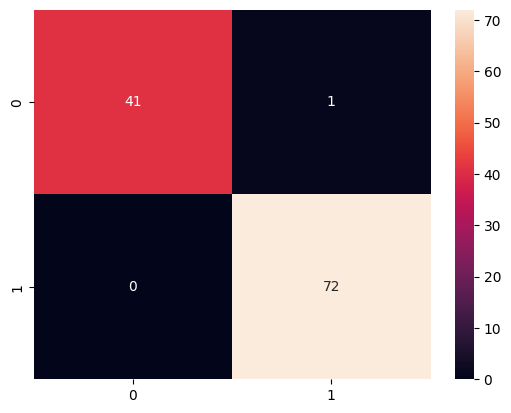

precision = 0.9863
recall = 1.0000


In [134]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)
plt.show()
print("precision = %6.4f" % precision_score(y_test,y_pred))
print("recall = %6.4f" % recall_score(y_test,y_pred))

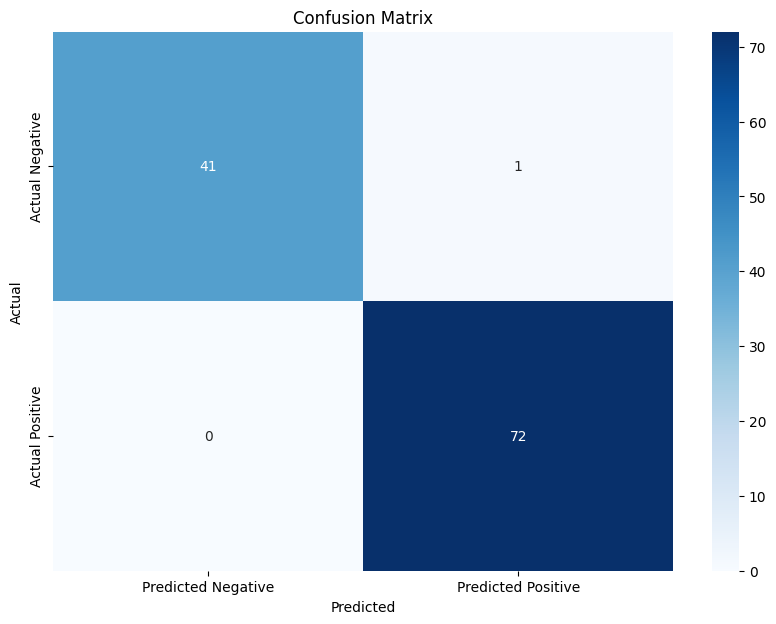

In [135]:
# Assuming you have already made predictions with your model
# y_pred = lr.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


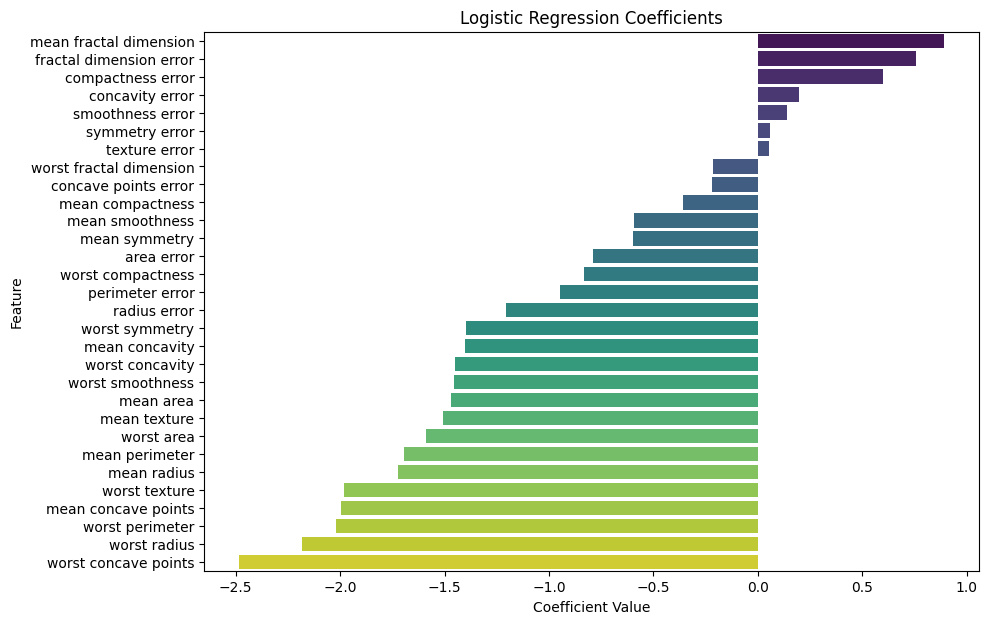

In [136]:
# Get the coefficients from the model
coefficients = lr.coef_[0]

# Create a DataFrame for better visualization
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(len(coefficients))]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


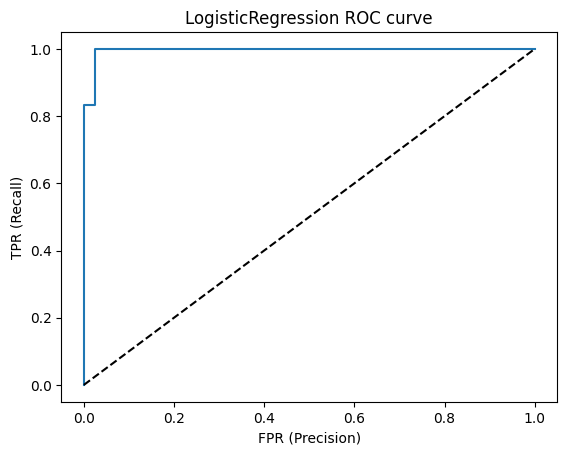

Area under curve (AUC):  0.996031746031746


In [137]:
y_score = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('LogisticRegression ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [138]:
# 디시전트리 분류분석

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=156)

In [140]:
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))

0.9298245614035088


In [141]:
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



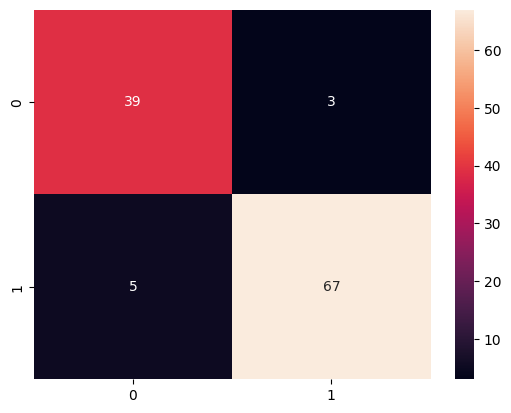

precision = 0.9571
recall = 0.9306


In [142]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)
plt.show()
print("precision = %6.4f" % precision_score(y_test,y_pred))
print("recall = %6.4f" % recall_score(y_test,y_pred))

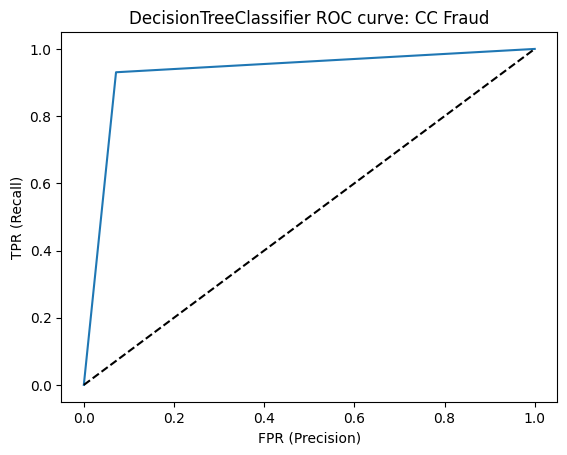

Area under curve (AUC):  0.9295634920634921


In [143]:
y_score = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('DecisionTreeClassifier ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

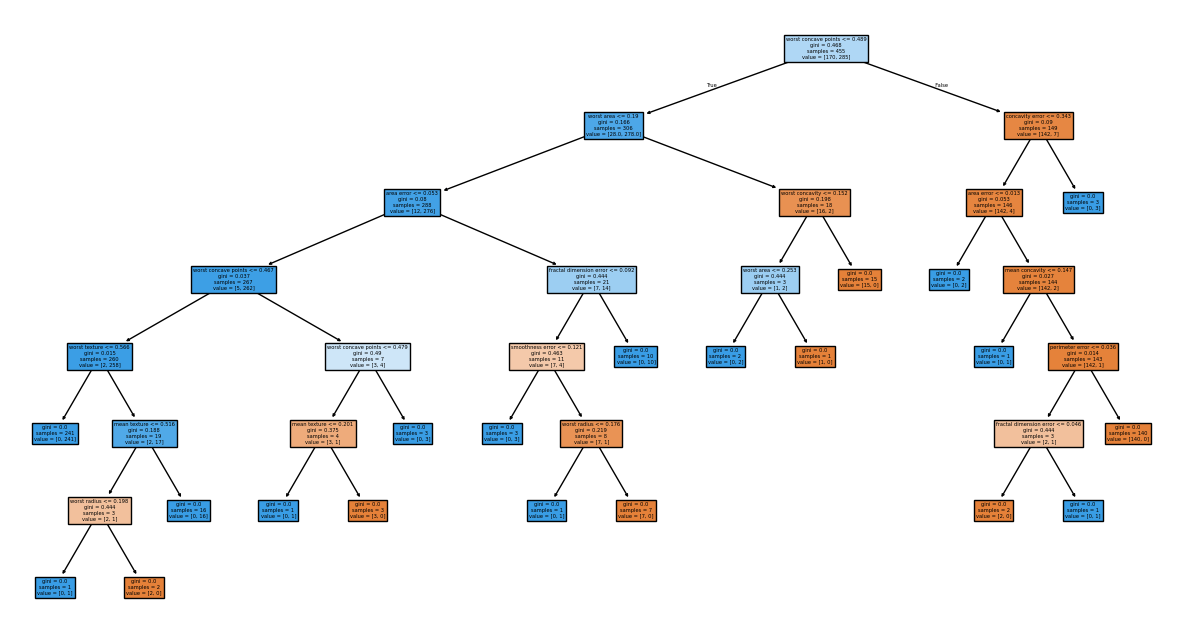

In [144]:
from sklearn import tree

fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(dt,
                  feature_names=breast_cancer_data.feature_names,
                  filled=True)

In [145]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, random_state=156)

In [146]:
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))

0.9473684210526315


In [147]:
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



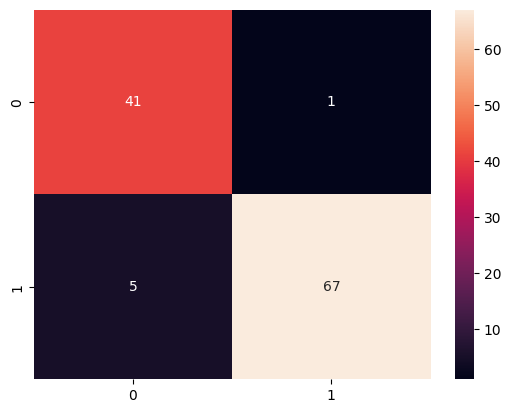

precision = 0.9853
recall = 0.9306


In [148]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)
plt.show()
print("precision = %6.4f" % precision_score(y_test,y_pred))
print("recall = %6.4f" % recall_score(y_test,y_pred))

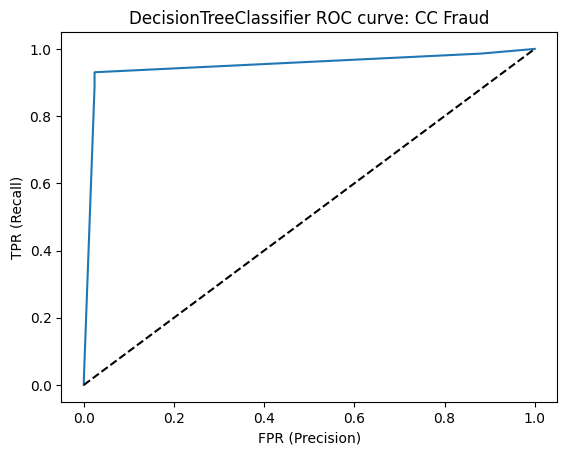

Area under curve (AUC):  0.9503968253968255


In [149]:
y_score = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('DecisionTreeClassifier ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

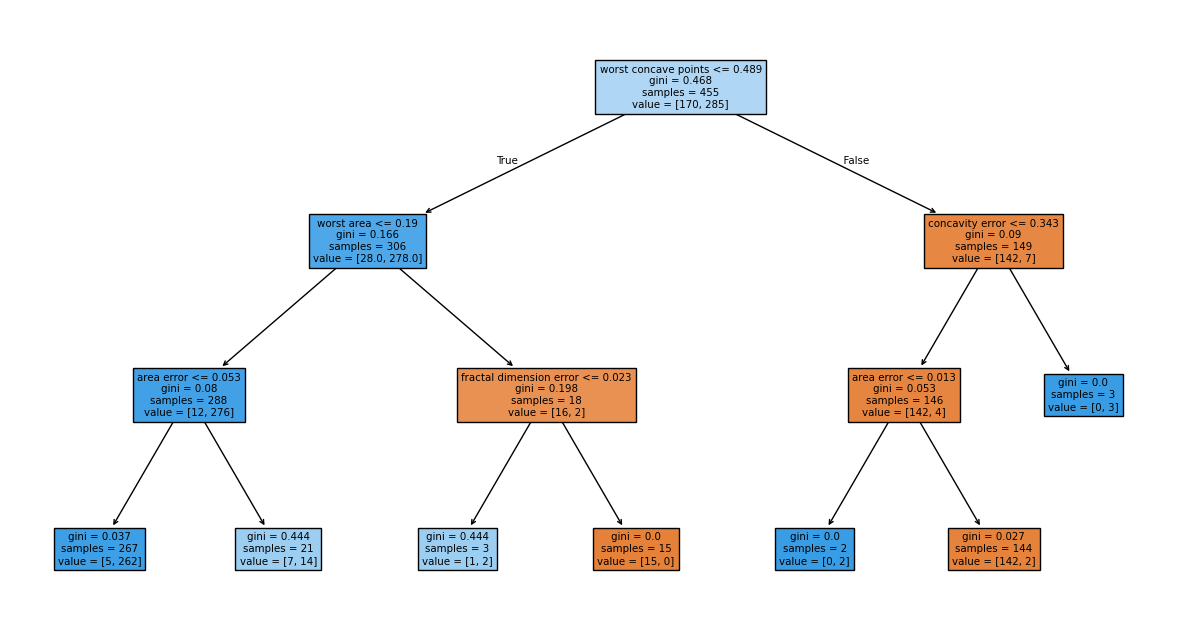

In [150]:
from sklearn import tree

fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(dt,
                  feature_names=breast_cancer_data.feature_names,
                  filled=True)

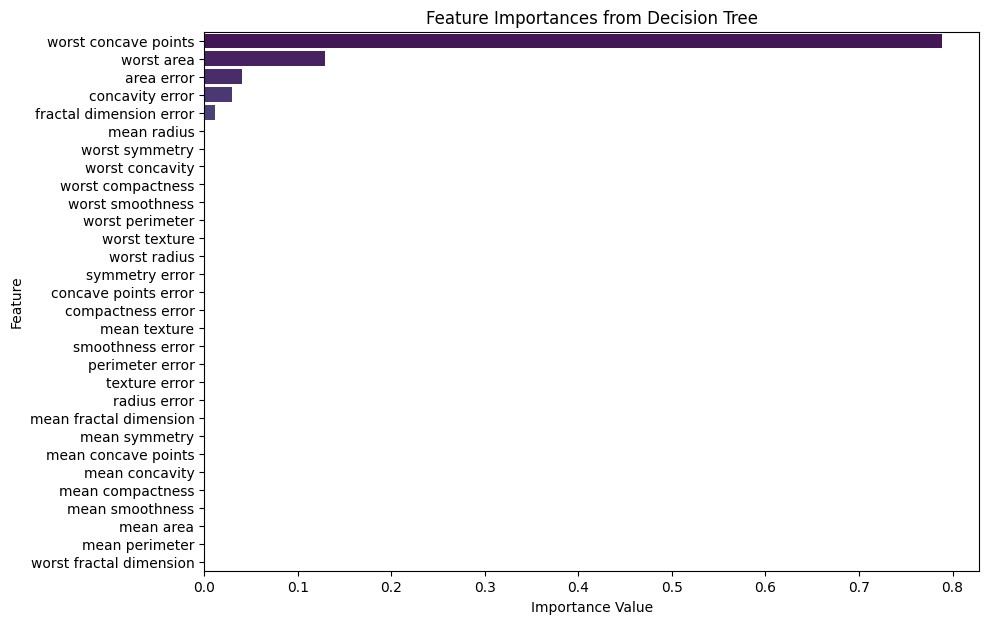

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already fitted your model
# dt.fit(X_train, y_train)

# Get the feature importances from the model
feature_importances = dt.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(len(feature_importances))]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()


In [152]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04078806, 0.        ,
       0.        , 0.02949701, 0.        , 0.        , 0.01178628,
       0.        , 0.        , 0.        , 0.1289904 , 0.        ,
       0.        , 0.        , 0.78893826, 0.        , 0.        ])

In [153]:
pd.Series(dt.feature_importances_, index = breast_cancer_data.feature_names)

mean radius                0.000000
mean texture               0.000000
mean perimeter             0.000000
mean area                  0.000000
mean smoothness            0.000000
mean compactness           0.000000
mean concavity             0.000000
mean concave points        0.000000
mean symmetry              0.000000
mean fractal dimension     0.000000
radius error               0.000000
texture error              0.000000
perimeter error            0.000000
area error                 0.040788
smoothness error           0.000000
compactness error          0.000000
concavity error            0.029497
concave points error       0.000000
symmetry error             0.000000
fractal dimension error    0.011786
worst radius               0.000000
worst texture              0.000000
worst perimeter            0.000000
worst area                 0.128990
worst smoothness           0.000000
worst compactness          0.000000
worst concavity            0.000000
worst concave points       0

In [154]:
# 랜덤포레스트 분류분석

In [155]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth =5, random_state=156, n_estimators = 1000)

In [156]:
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.9736842105263158


In [157]:
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



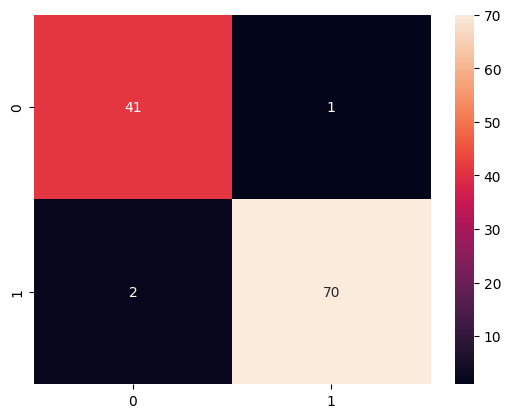

precision = 0.9859
recall = 0.9722


In [158]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)
plt.show()
print("precision = %6.4f" % precision_score(y_test,y_pred))
print("recall = %6.4f" % recall_score(y_test,y_pred))

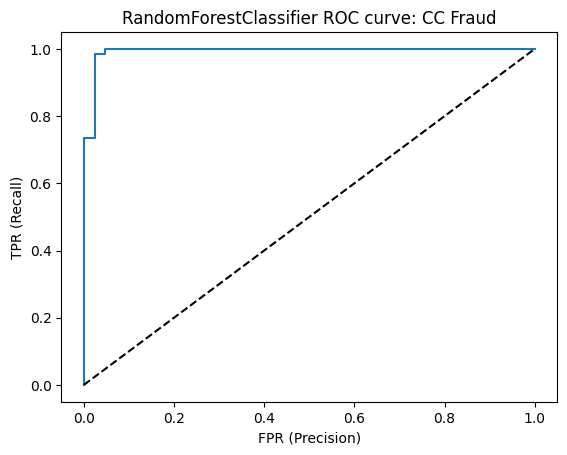

Area under curve (AUC):  0.9933862433862433


In [159]:
y_score = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('RandomForestClassifier ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

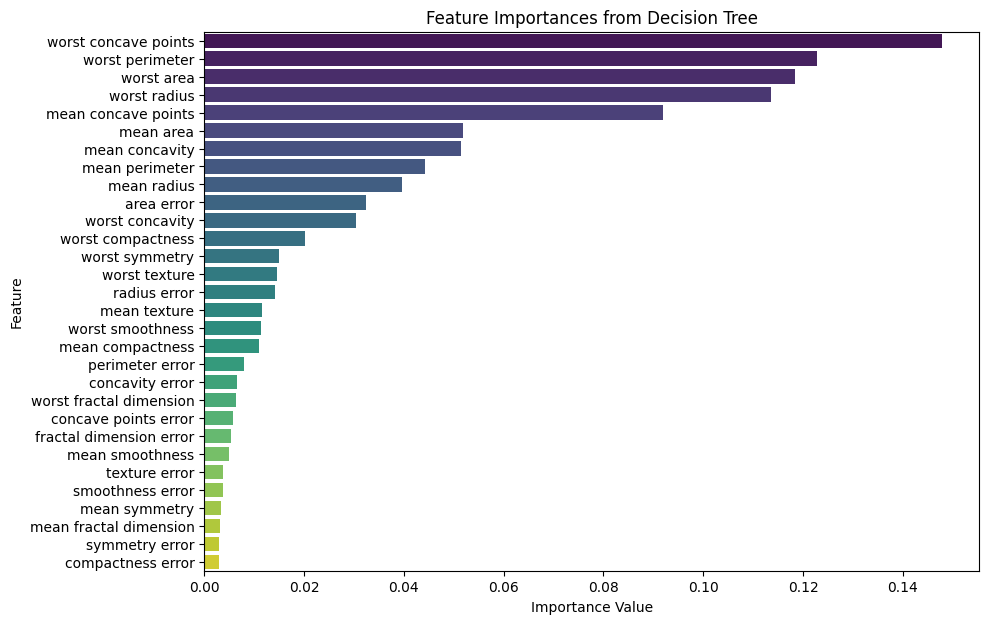

In [160]:
# Get the feature importances from the model
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(len(feature_importances))]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()